In [59]:
#!pip install keras
#!pip install tensorflow

In [60]:
import keras
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#print(keras.__version__)

#### Model Initialisation
We use a model to deal with a classification problem. For this, we use a dense (aka fully connected, i.e. each input node is connected to every output node) model with two layers which we add consecutively. The input into a model is typically a vector / matrix / tensor; only the first layer has an input shape (the others will be simple vectors). This means fixed input size for each layer:
* First layer: input = 784 = 28 * 28 and output = 512
* Second layer: input = 512 and output = 10

The input size of the second layer is exactly the output size of the first layer.

In [61]:
model = models.Sequential()
model.add(layers.Dense(
    512, 
    activation="relu", 
    input_shape=(28 * 28,)
))
model.add(layers.Dense(10, activation="softmax"))

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#### Additional explanations
Internally, the algorithm does a vector multiplication with a weight matrix _W_ 784 x 512 in order to arrive at the output of 512. It also adds a bias _b_ of size 1 x 512 to it - that's why the sum of parameters of 401'920 is the sum of 784 x 512 and 512.

The algorithm changes the weights and biases until we have a good matching. This is then repeated for the other layer(s).

_Hyperparameter_: The 512 above is a hyperparameter. Here we knew already what to take, but normally we would need to set this appropriately. Typically this is smaller than the input vector.

_Activation function_: The 'activation' parameter determines how the threshold (see axiom comparison) is set. It's an activation function (which makes it non-linear and thus allows dealing with non-linear effects). Here we use the ReLU (rectified linear unit) function (which is typically a good start) and Softmax (the sum of all outputs is 1, and each output is between 0 and 1) function (which is typically used for classification problems). The bias helps to set the activation up and down. It makes fire the right neurons at the right time.

_Compilation_: The 'optimizer' changes the learning time. The _rmsprop_ is always a good start. The 'loss' stands for loss function - how far is the result from the expected? We use categorical_crossentropy; 'categorical' because we have more than two classes, 'cross-entropy' because we use this measure (=distances between probability distributions) to measure the difference between categories; this is typically used for categorical classifications.
What to take for which problem is in the end a decision tree (see later days). The _metrics_ can be either 'accuracy' or 'loss'; here we use 'accuracy' because it's a classification program.

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [63]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#print("Train:", train_images.shape)
#print("Test:", test_images.shape)

#for i in range(1):
#    plt.imshow(train_images[i], cmap="gray")
#    plt.title("image " + str(i) + ": " + str(train_labels[i]))
#    plt.show()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255.0

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255.0

#print("Before:", train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#print("After:", train_labels[0])

#### Reshaping / data typing
We need to convert to a vector.
We need to convert to floats between 0 and 1; in general NN do not like numbers from different domains.

In [64]:
#model.evaluate(train_images, train_labels)

In [65]:
#print(np.max(model.predict(train_images[0:1])))
#print(np.argmax(model.predict(train_images[0:1])))
#print(train_labels[0])

In [66]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size=128
)

Epoch 1/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.2552 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.1048 - acc: 0.9684
Epoch 3/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0687 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0495 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0383 - acc: 0.9884


#### Fitting (Epochs / Batches / Steps)
* One epoch means going through all 60'000 pictures.
* After each batch of 128 pictures the weights / biases are updated (this is a step), then the next batch is run through. Batch size needs to be a power of 2.


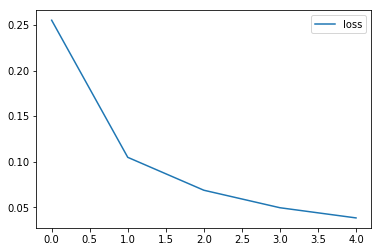

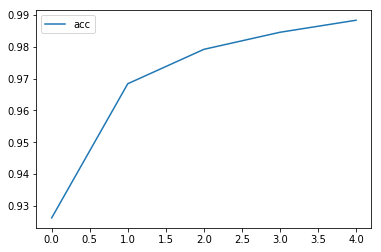

In [67]:
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.legend()
plt.show()
plt.close()

In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 75us/step
0.06849146048831753 0.9787


Above we test the accuracy of the model with the test data set.

In [69]:
print(np.max(model.predict(train_images[0:1])))
print(np.argmax(model.predict(train_images[0:1])))
print(train_labels[0])

0.9975885
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


And we also test the prediction for one specific picture of the train data set.